In [2]:
# %reset
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import *
sns.set()

In [6]:
data = pd.read_csv('../data/daint-data/daint_res_20210820.csv', encoding='latin-1', on_bad_lines='skip', lineterminator='\n')
data2 = pd.read_csv('../data/daint-data/daint_res_20210830.csv', encoding='latin-1', on_bad_lines='skip', lineterminator='\n')

In [7]:
data.shape
data.columns
data.index
data.info
data.describe
data.head()

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy,Path_location,class,fps,model,sample,resample,ID
0,1.0,0.0,0.024096,NaN,0.024096,1.0,0.047059,0.024096,0.024096,1.0,0.5,NaN,class143,Atompair,CSimca,NaN,LGOCV,class143_Atompair-rdkit_CSimca_NA_LGOCV
1,1.0,0.0,0.024096,NaN,0.024096,1.0,0.047059,0.024096,0.024096,1.0,0.5,NaN,class143,Atompair,CSimca,NaN,boot,class143_Atompair-rdkit_CSimca_NA_boot
2,1.0,0.0,0.024096,NaN,0.024096,1.0,0.047059,0.024096,0.024096,1.0,0.5,NaN,class143,Atompair,CSimca,NaN,repeatedcv,class143_Atompair-rdkit_CSimca_NA_repeatedcv
3,1.0,0.0,0.024096,NaN,0.024096,1.0,0.047059,0.024096,0.024096,1.0,0.5,NaN,class143,Atompair,CSimca,down,LGOCV,class143_Atompair-rdkit_CSimca_down_LGOCV
4,1.0,0.0,0.024096,NaN,0.024096,1.0,0.047059,0.024096,0.024096,1.0,0.5,NaN,class143,Atompair,CSimca,down,boot,class143_Atompair-rdkit_CSimca_down_boot


In [8]:
data.columns

Index(['Sensitivity', 'Specificity', 'Pos Pred Value', 'Neg Pred Value',
       'Precision', 'Recall', 'F1', 'Prevalence', 'Detection Rate',
       'Detection Prevalence', 'Balanced Accuracy', 'Path_location', 'class',
       'fps', 'model', 'sample', 'resample', 'ID'],
      dtype='object')

In [9]:
df = data[:]
df = df[df.columns.drop(list(df.filter(regex='Path')))]
df.head()
df.dtypes

Sensitivity             float64
Specificity             float64
Pos Pred Value          float64
Neg Pred Value          float64
Precision               float64
Recall                  float64
F1                      float64
Prevalence              float64
Detection Rate          float64
Detection Prevalence    float64
Balanced Accuracy       float64
class                    object
fps                      object
model                    object
sample                   object
resample                 object
ID                       object
dtype: object

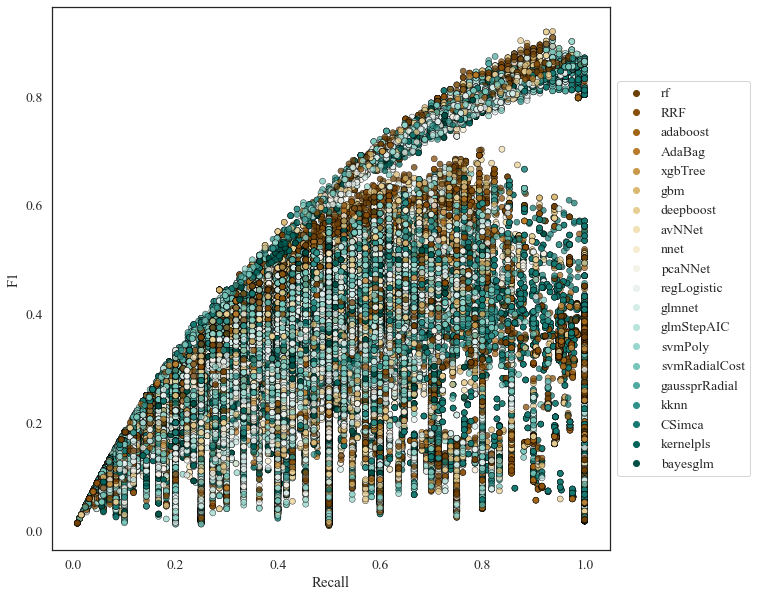

In [51]:
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

hue_order = ["rf", "RRF", "adaboost", "AdaBag", "xgbTree", "gbm", "deepboost", # random forest based methods
             "avNNet", "nnet", "pcaNNet",
             "regLogistic", "glmnet", "glmStepAIC",  
             "svmPoly", "svmRadialCost", "gaussprRadial",
             "kknn", "CSimca", "kernelpls", "bayesglm"]


g = sns.scatterplot(data=df, x="Recall", y="F1",
                hue="model", palette="BrBG", x_jitter=0.05, y_jitter=0.05, 
               edgecolor = "black", linewidth=0.5, alpha = 0.75, hue_order = hue_order)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('fig1.svg', bbox_inches = 'tight')

In [52]:
# model = df.model.drop_duplicates()
# model.shape
# print(model)

fps = df.fps.drop_duplicates()
fps.shape
print(fps)

df.groupby('class')['class'].nunique()
df.nunique()

0         Atompair
117         Avalon
235          FCFP6
376          ECFP0
590          ECFP2
768          ECFP4
900          ECFP6
1027         FCFP0
1254         FCFP2
1450         FCFP4
1623        EState
1862      Extended
1993    FeatMorgan
2146       Layered
2308         MACCS
2748        Morgan
2888       Pattern
3032       Pubchem
3197         RDkit
3346      Standard
3474       Torsion
3651      ToxPrint
Name: fps, dtype: object


Sensitivity               1019
Specificity               5844
Pos Pred Value            5814
Neg Pred Value            7350
Precision                 5348
Recall                    1019
F1                        5580
Prevalence                  74
Detection Rate            1455
Detection Prevalence      5151
Balanced Accuracy        24109
class                       48
fps                         22
model                       20
sample                       4
resample                     3
ID                      120822
dtype: int64

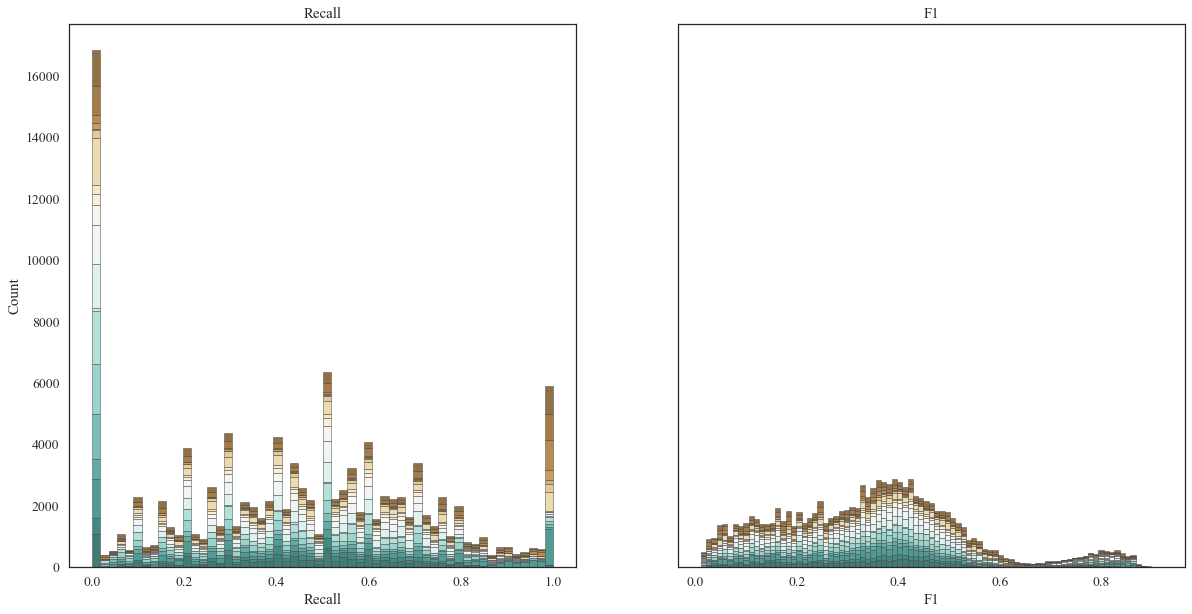

In [53]:
hue_order = ["rf", "RRF", "adaboost", "AdaBag", "xgbTree", "gbm", "deepboost", # random forest based methods
             "avNNet", "nnet", "pcaNNet",
             "regLogistic", "glmnet", "glmStepAIC",  
             "svmPoly", "svmRadialCost", "gaussprRadial",
             "kknn", "CSimca", "kernelpls", "bayesglm"]

sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", data=df, x="Recall", hue="model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5, legend = False)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Recall")
sns.histplot(ax=axes[1], multiple="stack", data=df, x="F1", hue="model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5, legend = False)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("F1")
plt.savefig('fig2.svg')

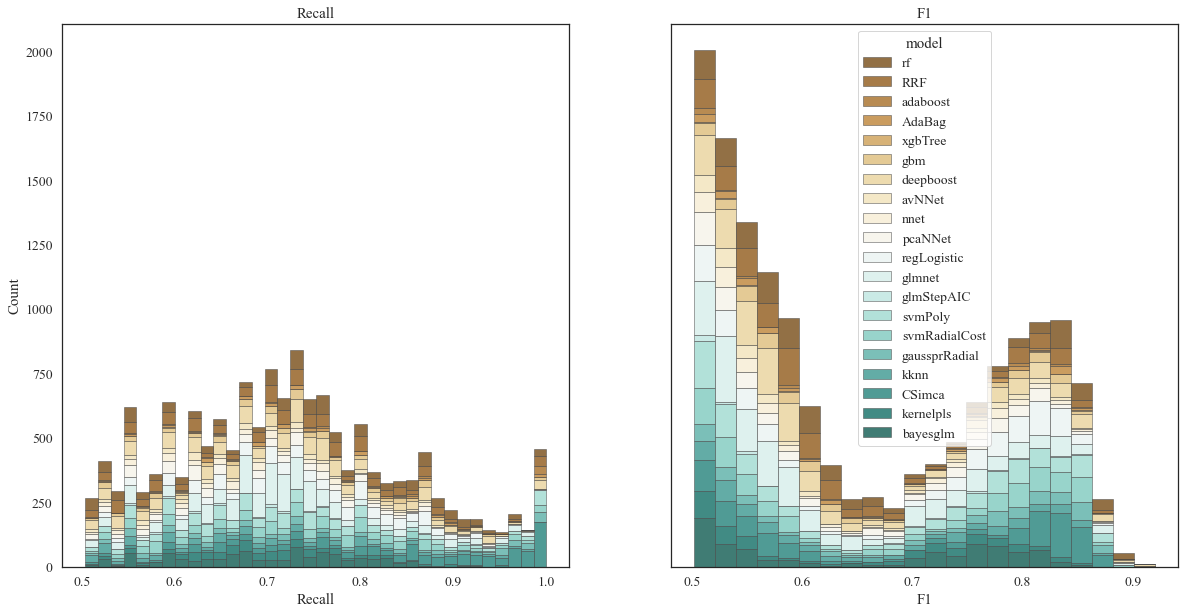

In [55]:
hue_order = ["rf", "RRF", "adaboost", "AdaBag", "xgbTree", "gbm", "deepboost", # random forest based methods
             "avNNet", "nnet", "pcaNNet",
             "regLogistic", "glmnet", "glmStepAIC",  
             "svmPoly", "svmRadialCost", "gaussprRadial",
             "kknn", "CSimca", "kernelpls", "bayesglm"]

sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

recallcon = df["Recall"] > 0.5
preccon = df["F1"] > 0.5
df_filt = df[recallcon & preccon]
df_filt.shape

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", data=df_filt, x="Recall", hue="model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5, legend = False)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Recall")
sns.histplot(ax=axes[1], multiple="stack", data=df_filt, x="F1", hue="model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("F1")
plt.savefig('fig3.svg')

In [ ]:
idx = df.groupby('class', as_index=False)["Recall"].transform(max) == df['Recall']
idx.shape

hue_order_model = ["rf", "RRF", "adaboost", "AdaBag", "xgbTree", "gbm", "deepboost",
             "avNNet", "nnet", "pcaNNet",
             "regLogistic", "glmnet", "glmStepAIC",  
             "svmPoly", "svmRadialCost", "gaussprRadial",
             "kknn", "CSimca", "kernelpls", "bayesglm"]
hue_order_fps = ["Avalon",  "Atompair", "ECFP0",  "ECFP2", "ECFP4", "ECFP6", "EState", "Extended", "FCFP0", "FCFP2", "FCFP4", "FCFP6", "FeatMorgan", 
                  "Morgan", "MACCS",  "Layered", "Pattern",  "Pubchem", "RDkit",  "Standard", "Torsion", "ToxPrint"]

sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

# recallcon = filtered_data["Recall"] > 0.5
# F1con = filtered_data["F1"] > 0.5
# df_filt = filtered_data[recallcon & F1con]

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", log_scale=False, edgecolor=".3", 
             linewidth=.5, data=df_means, x="Recall", hue="model", palette = "BrBG", hue_order = hue_order_model)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Models winning per class")
sns.histplot(ax=axes[1], multiple="stack", log_scale=False, edgecolor=".3", 
             linewidth=.5, data=df_means, x="Recall", hue="fps", palette = "BrBG_r", hue_order = hue_order_fps)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("Best fps per endpoint")
plt.savefig('fig4.svg')

/tmp/ipykernel_6468/476412928.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  idx = df.groupby('class', as_index=False)["Recall"].transform(max) == df['Recall']


In [94]:
idx = df.groupby('class')["Recall"].transform(max) == df['Recall']
idx.shape

(120822,)

In [91]:

idx.head(20)

,class,Recall,F1,Specificity,Balanced Accuracy
0,class143,1.000000,0.250000,1.000000,0.802469
1,class176,1.000000,0.515152,1.000000,0.693711
2,class179,1.000000,0.474227,1.000000,0.762245
3,class180,1.000000,0.655172,1.000000,0.801478
4,class183,1.000000,0.560000,1.000000,0.734639
5,class2,1.000000,0.361111,1.000000,0.799857
6,class29,1.000000,0.617021,1.000000,0.785676
7,class35,1.000000,0.428571,1.000000,0.739831
8,class38,1.000000,0.500000,1.000000,0.849438
9,class41,1.000000,0.638298,1.000000,0.861139


In [74]:
mean_recall = df.groupby('class', as_index=False)['Recall'].mean()
print(mean_recall)

       class    Recall
0   class143  0.186258
1   class176  0.443573
2   class179  0.420628
3   class180  0.607495
4   class183  0.474994
5     class2  0.479640
6    class29  0.543990
7    class35  0.297774
8    class38  0.398808
9    class41  0.560985
10  class449  0.344073
11   class45  0.454052
12  class488  0.748287
13  class494  0.625254
14  class498  0.540592
15  class500  0.560261
16  class506  0.582820
17  class507  0.143590
18  class508  0.578088
19  class519  0.306332
20  class520  0.454879
21  class521  0.344850
22  class522  0.574336
23  class524  0.503567
24  class525  0.245771
25  class526  0.491804
26  class530  0.544004
27  class532  0.600428
28  class534  0.562770
29  class538  0.480119
30  class545  0.244697
31  class546  0.447899
32  class554  0.579833
33  class558  0.442039
34  class559  0.411078
35  class565  0.320432
36  class566  0.379898
37  class570  0.412231
38  class571  0.160159
39  class572  0.530311
40  class573  0.368379
41  class578  0.447364
42  class57